In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models


# **Fully Connected model**

In [2]:
#load fashin mnist dataset
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

#scale data
training_images=training_images / 255.0
test_images=test_images / 255.0

print(training_labels[:10])

4431872/4422102 [==============================] - 0s 0us/step
[9 0 0 3 0 2 7 2 5 5]


Model: "Fully_Connected"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dens1 (Dense)               (None, 128)               100480    
                                                                 
 Dens2 (Dense)               (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


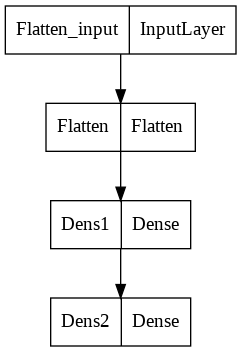

In [14]:
def get_model_fc():
  model = keras.models.Sequential(name="Fully_Connected")
  model.add(keras.layers.Flatten(input_shape=(28,28), name="Flatten"))
  model.add(keras.layers.Dense(128, activation=keras.activations.relu, name="Dens1"))
  model.add(keras.layers.Dense(10, activation='softmax', name="Dens2"))
  model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  return model

model_fc = get_model_fc()
model_fc.summary()

plot_model(model_fc, to_file="model_fc.png")

In [16]:
history =model_fc.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4927 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3716 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8921


In [18]:

test_loss, test_acc = model_fc.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8783
0.8783000111579895


# **CNN Model**

In [22]:
training_images.shape

(60000, 28, 28)

In [24]:
#load fashin mnist dataset
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(training_images.shape)

#reshape
training_images = training_images.reshape(training_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)
print(training_images.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               20

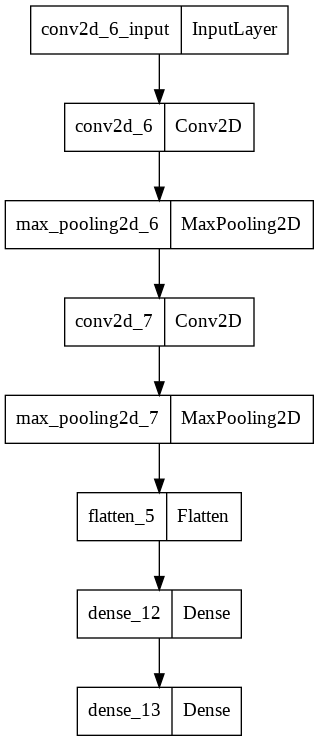

In [28]:
#define model
def get_model_cnn():
  model_cnn = tf.keras.models.Sequential(name="cnn_model")
  model_cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model_cnn.add(keras.layers.MaxPooling2D(2,2))
  model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
  model_cnn.add(keras.layers.MaxPooling2D((2,2)))
  model_cnn.add(tf.keras.layers.Flatten())
  model_cnn.add(tf.keras.layers.Dense(128, activation=keras.activations.relu))
  model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

  model_cnn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

  return model_cnn

model_cnn = get_model_cnn()
model_cnn.summary()
plot_model(model_cnn, to_file="model_fc.png")

In [29]:
history =model_cnn.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 6ms/step - loss: 0.5873 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3230 - accuracy: 0.8809
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2864 - accuracy: 0.8928
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2607 - accuracy: 0.9030
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2370 - accuracy: 0.9108


In [30]:
test_loss, test_acc = model_fc.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 52.8196 - accuracy: 0.8594
0.8593999743461609


In [32]:
# import os
# os.mkdir("myModel")

model_cnn.save("myModel/model_cnn.h5")

model_cnn.save_weights("myModel/model_cnn_wights.h5")


In [33]:
loaded_model = keras.models.load_model("/content/myModel/model_cnn.h5")
loaded_model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               20

# **Visualizing the Convolutions and Pooling**

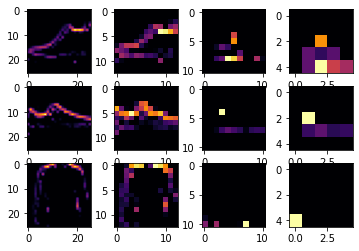

In [46]:

f, axarr = plt.subplots(3,4)

image1=0
image2=12
image3=26
cnn_filter = 10

layer_outputs = [layer.output for layer in model_cnn.layers]
activation_model = tf.keras.models.Model(inputs = model_cnn.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[image1].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, cnn_filter], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[image2].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, cnn_filter], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[image3].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, cnn_filter], cmap='inferno')
  axarr[2,x].grid(False)